In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import dynesty

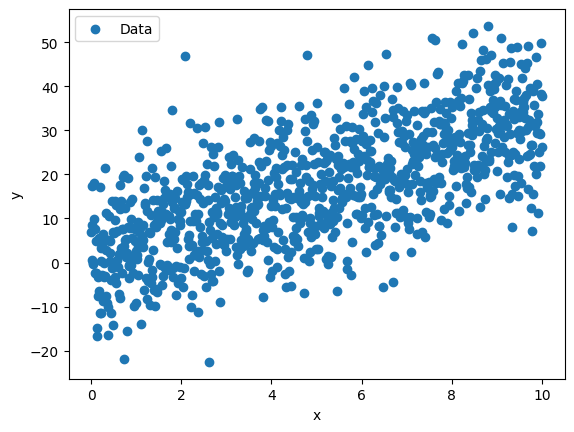

In [33]:
# True parameters
a_true = 2.0
b_true = 3.0
sigma_true = 10.0

num_points = 1000

# Generate synthetic data
np.random.seed(42)
x = np.linspace(0, 10, num_points)
y = a_true + b_true * x + np.random.normal(0, sigma_true, size=len(x))

# Plot data
plt.scatter(x, y, label="Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [34]:
def prior_transform(u):
    a = 10 * (2 * u[0] - 1)  # Uniform prior for 'a' in [-10,10]
    b = 10 * (2 * u[1] - 1)  # Uniform prior for 'b' in [-10,10]
    sigma = np.exp(6 * u[2] - 3)  # Log-uniform prior for sigma in [exp(-2), exp(2)]
    return np.array([a, b, sigma])


In [35]:
def log_likelihood(theta):
    a, b, sigma = theta
    model = a + b * x
    log_like = -0.5 * np.sum(((y - model) / sigma) ** 2 + np.log(2 * np.pi * sigma ** 2))
    return log_like


In [36]:
# Set up the Nested Sampler
sampler = dynesty.NestedSampler(log_likelihood, prior_transform, ndim=3, nlive=1000)

# Run the sampling
sampler.run_nested()
results = sampler.results

12461it [00:03, 3732.26it/s, +1000 | bound: 12 | nc: 1 | ncall: 53872 | eff(%): 25.460 | loglstar:   -inf < -3699.408 <    inf | logz: -3711.757 +/-  0.114 | dlogz:  0.001 >  1.009]


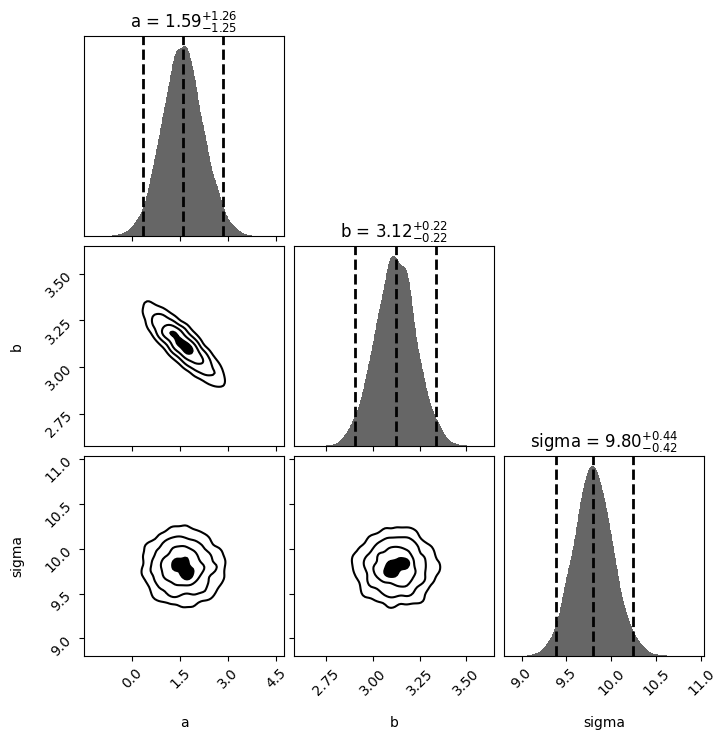

In [37]:
from dynesty import plotting as dyplot

# Corner plot of posteriors
fig, axes = dyplot.cornerplot(results, labels=['a', 'b', 'sigma'], show_titles=True)
plt.show()


/Users/nicolasanguita/miniforge3/envs/dgl-env/lib/python3.11/site-packages/dynesty/plotting.py:318: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


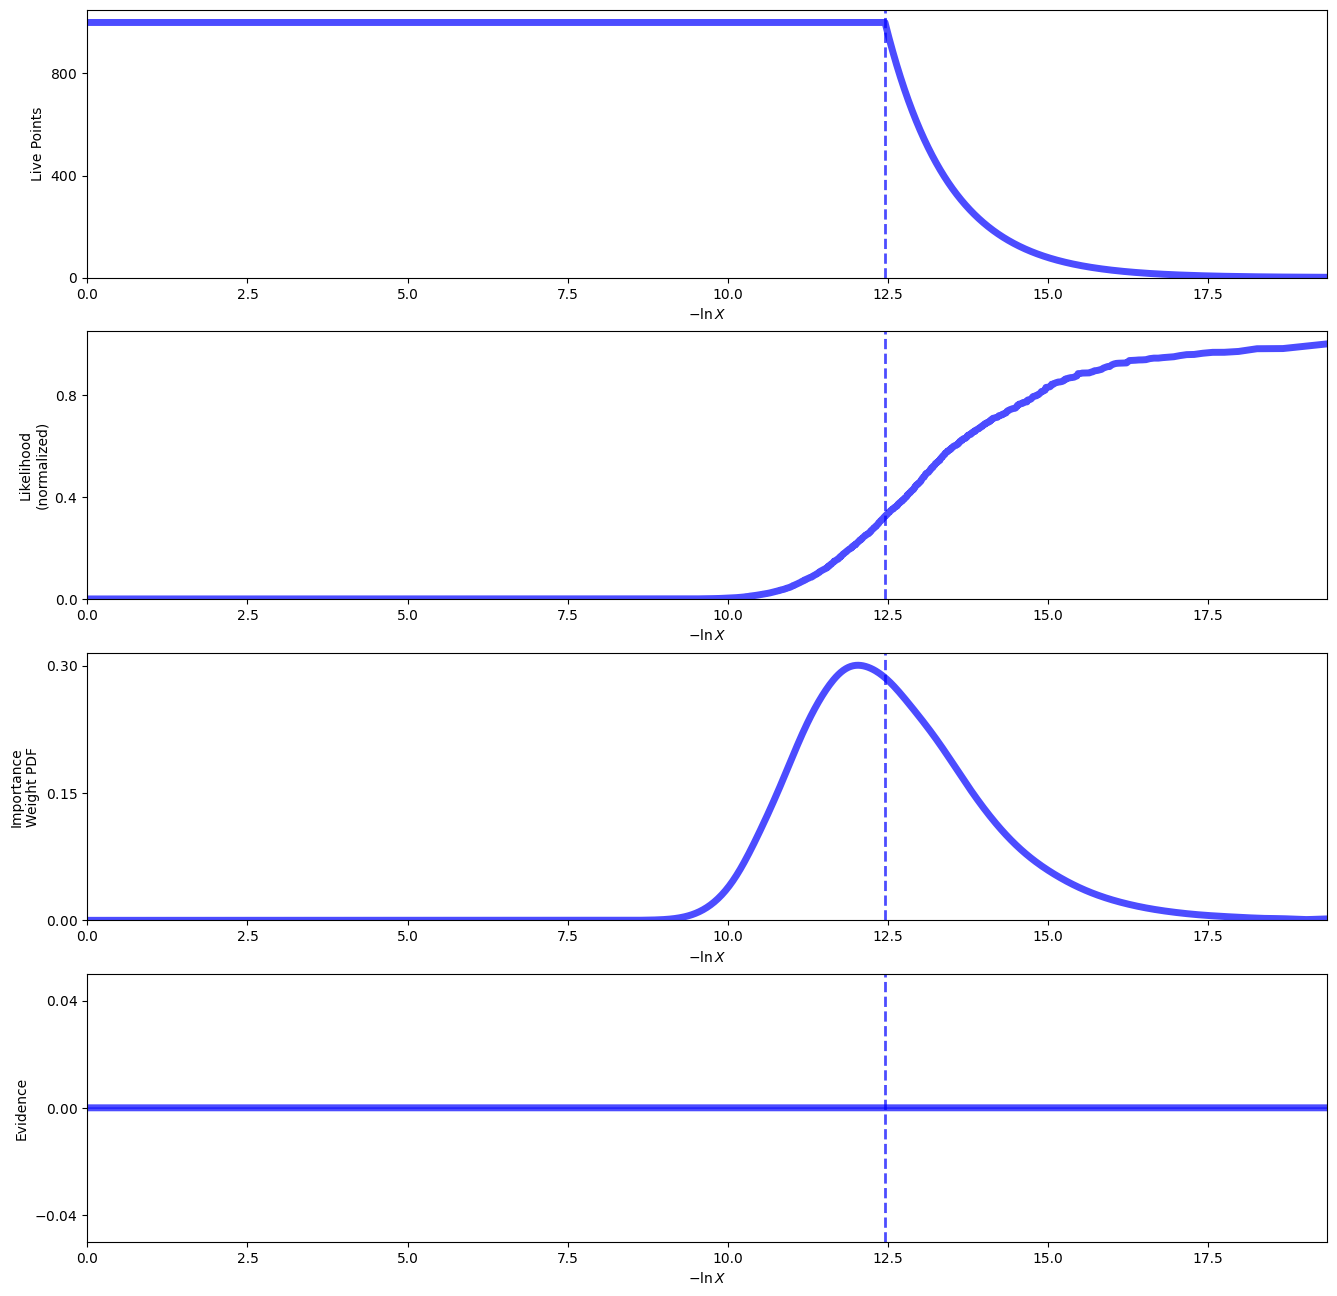

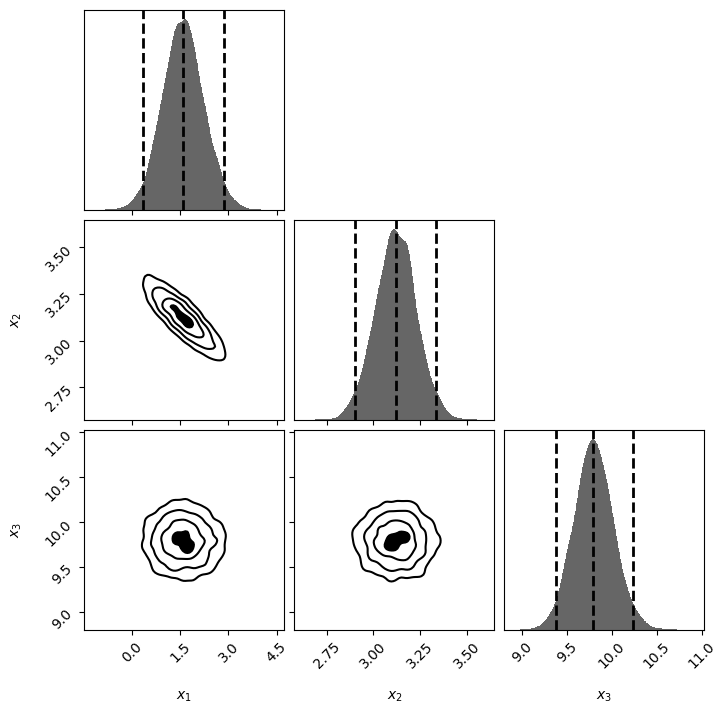

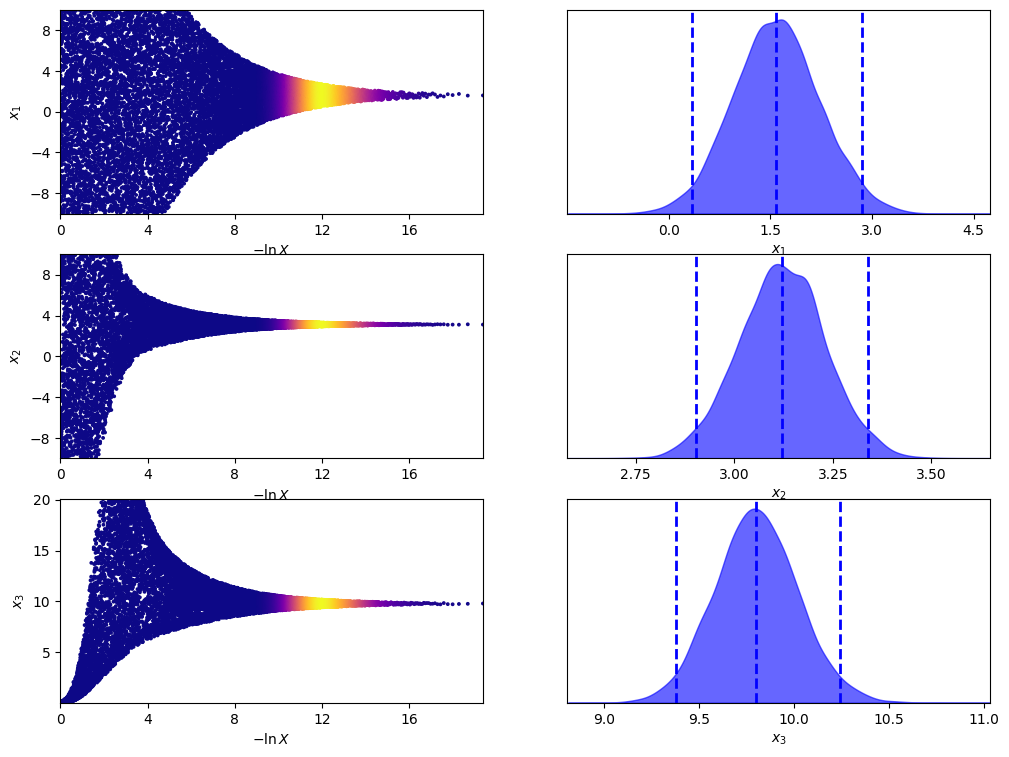

In [39]:
fig, axes = dyplot.runplot(results)
fig, axes = dyplot.cornerplot(results)
fig, axes = dyplot.traceplot(results)